# Generating Graphs Based upon Mean and SD

Mean and SD are statistically significant so we want to provide the user with some statistical information to guide them through their decision making process.

Standard imports

In [1]:
import pandas as pd
import numpy as np


# Import needed for Data Exploration and Algorithm Developing\

# Import Useful for plotting
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
from sklearn import preprocessing


data = pd.read_csv('../data/course-semesters.csv')
print len(data['student_ids'][0][1:-1].split(','))

25


/home/tj/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data.head()

,code-semester,code,semester,name,prof,redundant_codes,prereqs,student_ids
0,AHS CAP SPR 0607FA,AHS CAP SPR,0607FA,AHS CapstoneSpring Pre-registration,"Martello, Robert",[],[],"[23925034, 99052948, 29826367, 91614816, 95699..."
1,AHS CAP SPR 0708FA,AHS CAP SPR,0708FA,AHS CapstoneSpring Pre-registration,"Lynch, Caitrin",[],[],"[30876146, 98014488, 67373835, 67291012, 84935..."
2,AHS1101 0203FA,AHS1101,0203FA,History and Society Bodies in Motion: Migratio...,"Fleischmann, Fritz",[],[],"[39854219, 16495441, 74816072, 85835441, 28902..."
3,AHS1101 0304FA,AHS1101,0304FA,History and Society Bodies in Motion: Migratio...,"Fleischmann, Fritz",[],[],"[42715736, 29826367, 10463379, 22502956, 91614..."
4,AHS1102 0203FA,AHS1102,0203FA,Arts and Humanities The Quest,"Tropp, Martin",[],[],"[41057699, 96482981, 16062888, 59108778, 39329..."


In [3]:
# Checking total number of unique data in each column of data set
print 'total no. of cases: ', len(data)
for field in data:
    if field in ['Id']:
        continue
    else:
        print 'no. of unique data in ' + field + ':', len(data[field].unique())

total no. of cases:  1614
no. of unique data in code-semester: 1614
no. of unique data in code: 306
no. of unique data in semester: 28
no. of unique data in name: 490
no. of unique data in prof: 135
no. of unique data in redundant_codes: 1
no. of unique data in prereqs: 1
no. of unique data in student_ids: 1501


## Functions for Determining Mean and SD for Class ver num students

In [4]:
def edit_course_names_in_dataframe(data):
    """
    Rids of repetitive courses with alphabet in the end
    """
    for i in range(len(data['code'])):
        if data['code'][i][-1].isalpha():
            if data['code'][i][-1] is 'R':
                pass
            else:
                data['code'][i] = data['code'][i][0:-1]
        else:
            pass
    return data['code']

def list_all_courses(data):
    """
    Works for the course-semester.csv dataset
    finds mean number of students and standard deviation for each course
    throughout the years
    """
    course_data = edit_course_names_in_dataframe(data)
    holder = []
    for i in range(len(data)):
        if data['code'][i] not in holder:
            holder += [data['code'][i]]
        else:
            continue
    return holder        

def dict_code_index(data):
    """
    generates dictionary linking each course to index in csv
    """
    data2 = data
    data2['code'] = edit_course_names_in_dataframe(data)
    dict_code_index = {}
    for i in range(len(data2['code'])):
        if data2['code'][i] in dict_code_index:
            dict_code_index[data2['code'][i]] = dict_code_index[data2['code'][i]] + [i]
        else:
            dict_code_index[data2['code'][i]] = [i]
    return dict_code_index

def dict_code_mean(data):
    """
    Generates dictionary linking each course to mean num of students
    """
    data2 = data
    code_index = dict_code_index(data2)
    dict_code_mean = {}
    
    for key in code_index:
        a = float(0)
        for index in code_index[key]:
            a += len(data2['student_ids'][index][1:-1].split(','))
        dict_code_mean[key] = a/len(code_index[key])
    return dict_code_mean

from math import sqrt

def dict_code_sd(data):
    data2 = data
    code_mean = dict_code_mean(data2)
    code_index = dict_code_index(data2)
    
    dict_code_sd = {}
    
    for key in code_index:
        a = float(0)
        for index in code_index[key]:
            a += (len(data2['student_ids'][index][1:-1].split(',')) - code_mean[key])**2
        dict_code_sd[key] = sqrt(a/len(code_index[key]))
    
    return dict_code_sd

## Normal Distribution amongst mean

3.40181040765


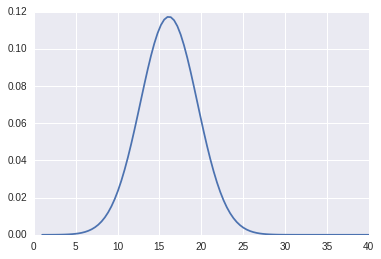

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
%matplotlib inline

code_mean = dict_code_mean(data)
code_sd = dict_code_sd(data)

i = 30
key = data['code'][i]

print code_sd[key]

mean = code_mean[key]
sigma = code_sd[key]
x = np.linspace(1,40,100)
plt.plot(x,mlab.normpdf(x,mean,sigma))

plt.show()


In [7]:
code_mean

{'AHS CAP SPR': 15.0,
 'AHS1101': 23.0,
 'AHS1102': 25.0,
 'AHS1105': 16.0,
 'AHS1110': 16.0,
 'AHS1111': 12.0,
 'AHS1120': 22.0,
 'AHS1122': 15.0,
 'AHS1130': 10.0,
 'AHS1140': 7.0,
 'AHS1150': 29.0,
 'AHS2110': 22.0,
 'AHSE0112': 16.136363636363637,
 'AHSE1100': 16.545454545454547,
 'AHSE1101': 12.5,
 'AHSE1102': 13.5,
 'AHSE1122': 14.0,
 'AHSE1130': 12.75,
 'AHSE1135': 13.0,
 'AHSE1140': 18.5,
 'AHSE1145': 13.25,
 'AHSE1150': 14.333333333333334,
 'AHSE1155': 18.0,
 'AHSE1199': 31.9,
 'AHSE11B': 1.0,
 'AHSE1500': 39.26315789473684,
 'AHSE1515': 52.75,
 'AHSE1599': 28.0,
 'AHSE2110': 20.444444444444443,
 'AHSE2112': 19.5,
 'AHSE2114': 19.75,
 'AHSE2120': 5.0,
 'AHSE2130': 3.0,
 'AHSE2131': 11.5,
 'AHSE2140': 11.0,
 'AHSE2141': 7.666666666666667,
 'AHSE2170': 7.0,
 'AHSE2199': 12.630434782608695,
 'AHSE3100': 4.0,
 'AHSE3130': 7.666666666666667,
 'AHSE3190': 12.375,
 'AHSE3199': 7.75,
 'AHSE3500': 8.0,
 'AHSE3510': 10.75,
 'AHSE3599': 10.363636363636363,
 'AHSE4190': 15.954545454545455

In [8]:
code_sd

{'AHS CAP SPR': 10.0,
 'AHS1101': 6.0,
 'AHS1102': 1.0,
 'AHS1105': 0.0,
 'AHS1110': 1.0,
 'AHS1111': 0.0,
 'AHS1120': 0.0,
 'AHS1122': 0.0,
 'AHS1130': 4.0,
 'AHS1140': 0.0,
 'AHS1150': 0.0,
 'AHS2110': 0.0,
 'AHSE0112': 3.4018104076486653,
 'AHSE11': 0.0,
 'AHSE1100': 2.147456692912312,
 'AHSE1101': 0.5,
 'AHSE1102': 0.5,
 'AHSE1122': 2.41522945769824,
 'AHSE1130': 1.6393596310755,
 'AHSE1135': 1.0,
 'AHSE1140': 1.5,
 'AHSE1145': 2.680951323690902,
 'AHSE1150': 4.921607686744467,
 'AHSE1155': 4.33589667773576,
 'AHSE1199': 15.53994851986325,
 'AHSE1500': 13.482316313808825,
 'AHSE1515': 30.978823412131067,
 'AHSE1599': 0.0,
 'AHSE2110': 1.4989708403591155,
 'AHSE2112': 4.5,
 'AHSE2114': 3.960744879438715,
 'AHSE2120': 4.0,
 'AHSE2130': 0.0,
 'AHSE2131': 1.3844373104863459,
 'AHSE2140': 0.0,
 'AHSE2141': 5.9066817155564495,
 'AHSE2170': 0.0,
 'AHSE2199': 6.172726462826385,
 'AHSE3100': 2.160246899469287,
 'AHSE3130': 3.0912061651652345,
 'AHSE3190': 5.31360282670807,
 'AHSE3199': 1.92